In [591]:
#import packages
import numpy as np     
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [592]:
#load provided dataset
training_set_labels = pd.read_csv('./Data/Training_Set_Labels.csv')
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [593]:
#check shape
training_set_labels.shape

(59400, 2)

In [594]:
#get summary
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [595]:
#get value count for each class
training_set_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**training_set_labels** dataset has no missing data. This is our target variable. There are three classes:
* ‘functioning’
* ‘non-functioning’ 
* ‘functioning needs repair’

In order for the classification model to correctly predict the target, we need to change the labels from strings to integers.

In [596]:
#load provided dataset
training_set_values = pd.read_csv('./Data/Training_Set_Values.csv')
training_set_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [597]:
#check the shape
training_set_values.shape

(59400, 40)

The dataset includes 40 independent features X.

In [598]:
#get summary
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [599]:
#check for missing values
training_set_values.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [600]:
#merge
df = pd.merge(training_set_labels, training_set_values, on = 'id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [601]:
#check shape
df.shape

(59400, 41)

The dataset has 59,400 entries and 40 columns/features (excluding 'id').
We will examine each column one by one.

## Explore Each Feature

In [602]:
#get column names
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [603]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [604]:
df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-01-07      1
2011-09-23      1
2011-08-31      1
2011-09-09      1
2002-10-14      1
Name: date_recorded, Length: 356, dtype: int64

In [605]:
from datetime import datetime

#convert 'date_recorded'to a datetime object
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

#add 'year_recorded' column
df['year_recorded'] = pd.DatetimeIndex(df['date_recorded']).year

#review
df.head(2)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013


In [606]:
df['year_recorded'].describe()

count    59400.000000
mean      2011.921667
std          0.958758
min       2002.000000
25%       2011.000000
50%       2012.000000
75%       2013.000000
max       2013.000000
Name: year_recorded, dtype: float64

In [607]:
df['funder'].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
                                  ... 
Saudia                               1
Taasaf                               1
Siter Fransis                        1
Shelisheli Commission                1
African Reflections Foundation       1
Name: funder, Length: 1897, dtype: int64

In [608]:
#'funder' has missing values
print('Missing values before:', df['funder'].isna().sum())

#fill missing values with 'Others'
df['funder'].fillna('Other', inplace = True)
print('Missing values after:', df['funder'].isna().sum())

Missing values before: 3635
Missing values after: 0


In [609]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [610]:
df['installer'].value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
DWE & LWI                   1
Tanzania government         1
Goldwill  foundation        1
Afroz Ismail                1
HESAWS                      1
Name: installer, Length: 2145, dtype: int64

In [611]:
#'installer' has missing values
print('Missing values before:', df['installer'].isna().sum())

#fill missing values with 'Others'
df['installer'].fillna('Other', inplace = True)
print('Missing values after:', df['installer'].isna().sum())

Missing values before: 3655
Missing values after: 0


In [612]:
df['wpt_name'].value_counts()

none                  3563
Shuleni               1748
Zahanati               830
Msikitini              535
Kanisani               323
                      ... 
Ccm Office Kifumbe       1
Modui 2                  1
Kwa Maela                1
Kwaihano                 1
Kumguruka B              1
Name: wpt_name, Length: 37400, dtype: int64

In [613]:
df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [614]:
#'num_private' has too many 0 values, drop it
df.drop(columns = 'num_private', axis = 1, inplace = True)

In [615]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [616]:
df['subvillage'].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Sangu Jineli      1
Mwaduguru         1
Zugimlole         1
Kinankoli         1
Tugi              1
Name: subvillage, Length: 19287, dtype: int64

In [617]:
#'subvillage' has missing values
print('Missing values before:', df['subvillage'].isna().sum())

#fill missing values with 'Others'
df['subvillage'].fillna('Other', inplace = True)
print('Missing values after:', df['subvillage'].isna().sum())

Missing values before: 371
Missing values after: 0


In [618]:
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [619]:
df['ward'].value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Kihangimahuka      1
Kitete             1
Mawenzi            1
Mkumbi             1
Kirongo            1
Name: ward, Length: 2092, dtype: int64

In [620]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [621]:
#'public_meeting' has missing values
print('Missing values before:', df['public_meeting'].isna().sum())

#fill missing values with 'False' because it's better to be false negative than false positive in this case
df['public_meeting'].fillna('False', inplace = True)
print('Missing values after:', df['public_meeting'].isna().sum())

Missing values before: 3334
Missing values after: 0


In [622]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [623]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [624]:
#'scheme_management' has missing values
print('Missing values before:', df['scheme_management'].isna().sum())

#fill missing values with 'Other' 
df['scheme_management'].fillna('Other', inplace = True)
print('Missing values after:', df['scheme_management'].isna().sum())

Missing values before: 3877
Missing values after: 0


In [464]:
df['scheme_name'].value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
Rain water harest             1
Mumikindo  spring source      1
BL Orkugu                     1
Mnazi moja                    1
Damowaso                      1
Name: scheme_name, Length: 2696, dtype: int64

In [625]:
#'scheme_name' has missing values
print('Missing values before:', df['scheme_name'].isna().sum())

#fill missing values with 'None' 
df['scheme_name'].fillna('None', inplace = True)
print('Missing values after:', df['scheme_name'].isna().sum())

Missing values before: 28166
Missing values after: 0


In [465]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [626]:
#'permit' has missing values
print('Missing values before:', df['permit'].isna().sum())

#fill missing values with 'False' because it's better to be false negative than false positive in this case
df['permit'].fillna('False', inplace = True)
print('Missing values after:', df['permit'].isna().sum())

Missing values before: 3056
Missing values after: 0


In [466]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [470]:
#replace '0' with median value
df['construction_year'].replace(0, df['construction_year'].median(), inplace = True)

#check
(df['construction_year'] == 0).sum()

0

In [483]:
#get 'age'
df['age'] = 2021 - df['construction_year'].map(int)
df['age'].value_counts()

35    21143
11     2645
13     2613
12     2533
21     2091
14     1587
15     1471
18     1286
10     1256
17     1123
9      1084
19     1075
43     1037
26     1014
16     1011
22      979
23      966
31      954
36      945
41      811
25      811
37      779
39      744
27      738
49      708
47      676
24      644
29      640
28      608
20      540
33      521
38      488
46      437
45      414
51      411
30      324
32      316
34      302
40      238
44      202
42      192
48      184
8       176
50      145
61      102
54       88
58       85
53       77
52       59
57       40
59       30
60       21
56       19
55       17
Name: age, dtype: int64

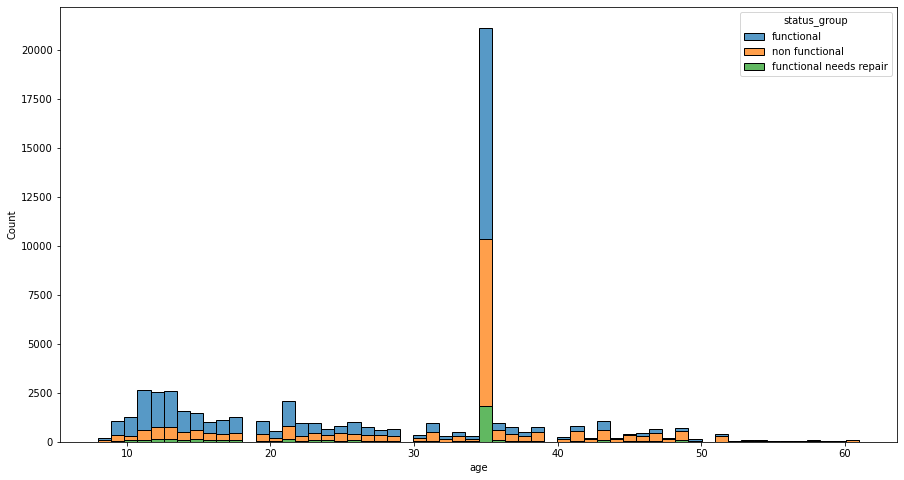

In [489]:
plt.figure(figsize = (15, 8))
sns.histplot(df, x = 'age', hue = 'status_group', multiple = 'stack')
plt.savefig('./Data/age_countplot')

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


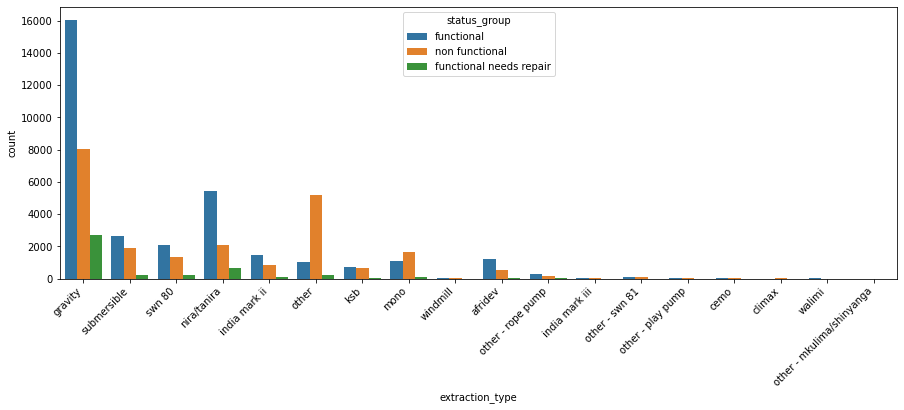

In [629]:
#get value count
print(df['extraction_type'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'extraction_type', hue = 'status_group', data=df)
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/extraction_type_countplot')

In [266]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [630]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_group', axis = 1, inplace = True)

In [267]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [631]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_class', axis = 1, inplace = True)

In [268]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [269]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [640]:
#'management' and 'management_group' have the same name, they might be sub-group of each other, let's group them together
df.groupby(['management_group', 'management']).count()

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     685         685   
                 private operator           1971    1971        1971   
                 trust                        78      78          78   
                 water authority             904     904         904   
other            other                       844     844         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1768        1768   
unknown          unknown                     561     561         561   
user-group       vwc                       40507   40507       40507   
                 water board                2933    2933        2933   
                 wua                        2535    2535        2535   
                 wug                        6515    6515        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 685        685       685       685   
                 private operator       1971       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         904        904       904       904   
other            other                   844        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1768       1768      1768      1768   
unknown          unknown                 561        561       561       561   
user-group       vwc                   40507      40507     40507     40507   
                 water board            2933       2933      2933      2933   
                 wua                    2535       2535      2535      2535   
                 wug                    6515       6515      6515      6515   

                                   ...  water_quality  quality_group  \
management_group management        ...                                 
commercial       company           ...            685            685   
                 private operator  ...           1971           1971   
                 trust             ...             78             78   
                 water authority   ...            904            904   
other            other             ...            844            844   
                 other - school    ...             99             99   
parastatal       parastatal        ...           1768           1768   
unknown          unknown           ...            561            561   
user-group       vwc               ...          40507          40507   
                 water board       ...           2933           2933   
                 wua               ...           2535           2535   
     

In [641]:
#'management_group' is just a bigger container of 'management' , drop it
df.drop(columns = 'management_group', axis = 1, inplace = True)

In [270]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [271]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [642]:
#this column is redundant since it is similar to 'payment', drop it, drop it
df.drop(columns = 'payment_type', axis = 1, inplace = True)

In [272]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [643]:
#get value count
print(df['population'].value_counts())

#too many 0 value, this column is not useful, drop it
df.drop(columns = 'population', axis = 1, inplace = True)

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


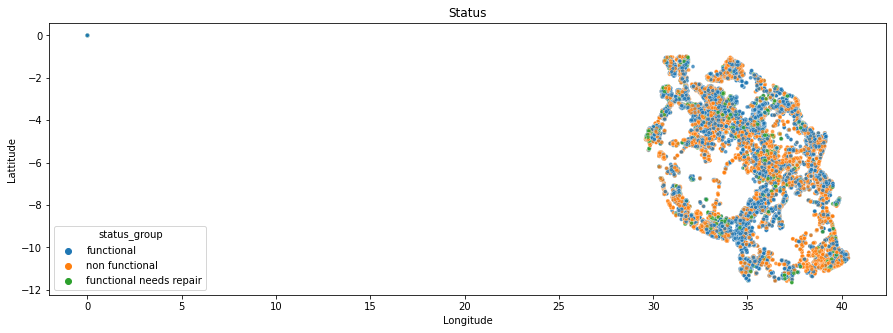

<Figure size 432x288 with 0 Axes>

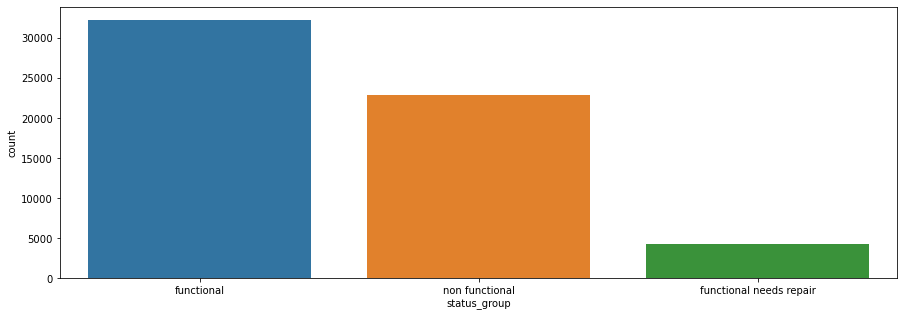

In [303]:
#get value count
print(df['status_group'].value_counts())
print()
print(df['status_group'].value_counts(normalize = True))

#plot 
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'status_group', data = df, alpha = 0.75, s = 15)
plt.title('Status')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/status_group_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', data=df)
plt.savefig('./Data/status_group_countplot')

There is a class imbalance for the target classes:

* 54% are functional
* 38% non-functional
* 7.26% functional, needs repair

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


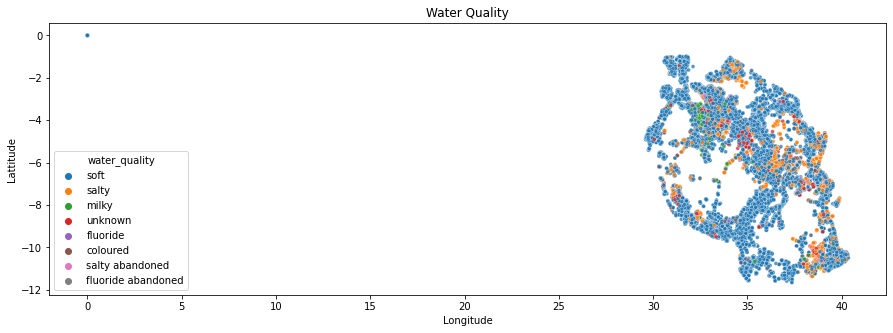

<Figure size 432x288 with 0 Axes>

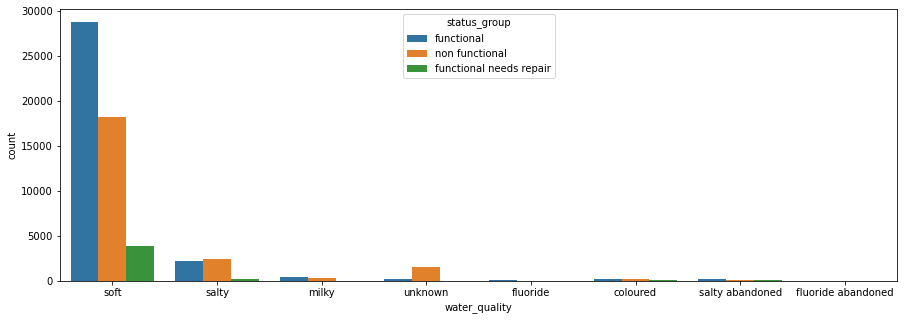

In [288]:
#get value count
print(df['water_quality'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'water_quality', data = df, alpha = 0.75, s = 15)
plt.title('Water Quality')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/water_quality_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'water_quality', hue = 'status_group', data=df)
plt.savefig('./Data/water_quality_countplot')

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


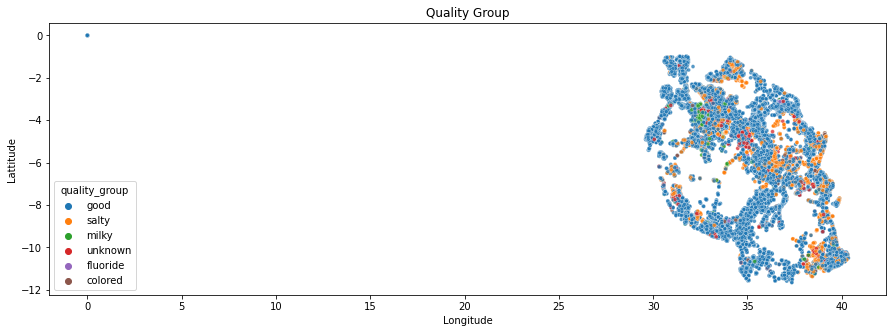

<Figure size 432x288 with 0 Axes>

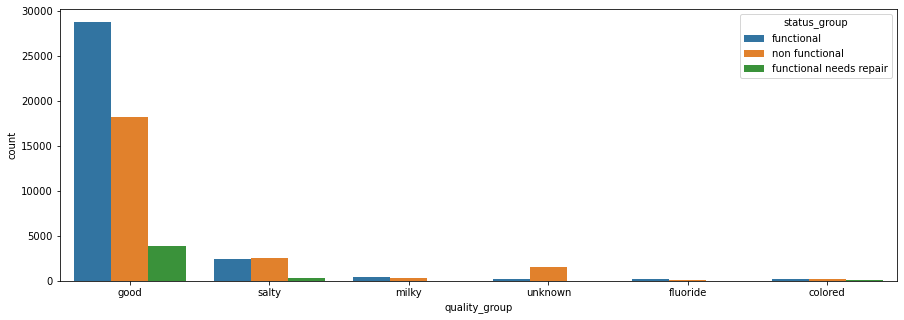

In [289]:
#get value count
print(df['quality_group'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quality_group', data = df, alpha = 0.75, s = 15)
plt.title('Quality Group')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/quality_group_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'quality_group', hue = 'status_group', data=df)
plt.savefig('./Data/quality_group_countplot')

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


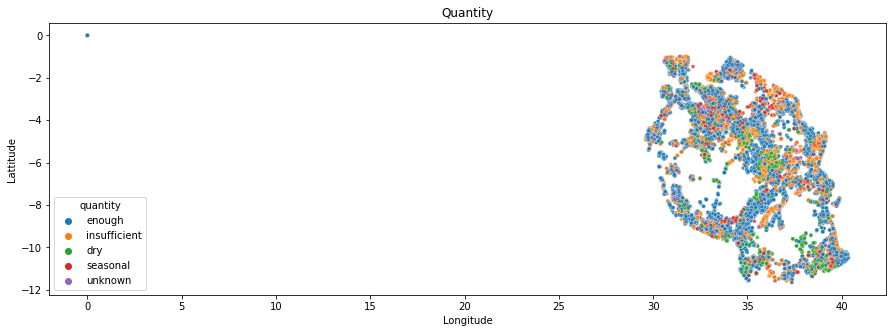

<Figure size 432x288 with 0 Axes>

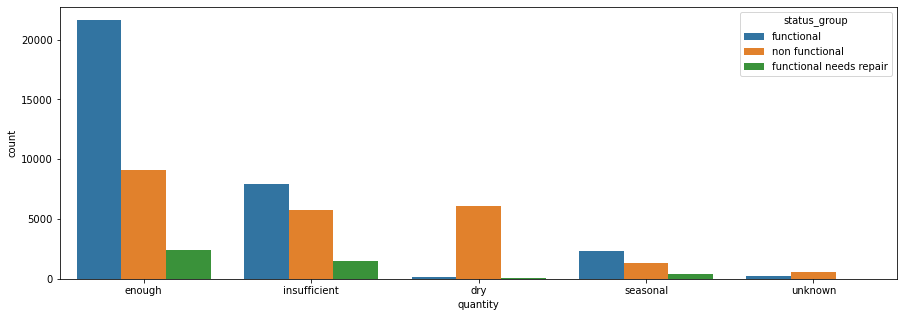

In [290]:
#get value count
print(df['quantity'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quantity', data = df, alpha = 0.75, s = 15)
plt.title('Quantity')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/quantity_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'quantity', hue = 'status_group', data=df)
plt.savefig('./Data/quantity_countplot')

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


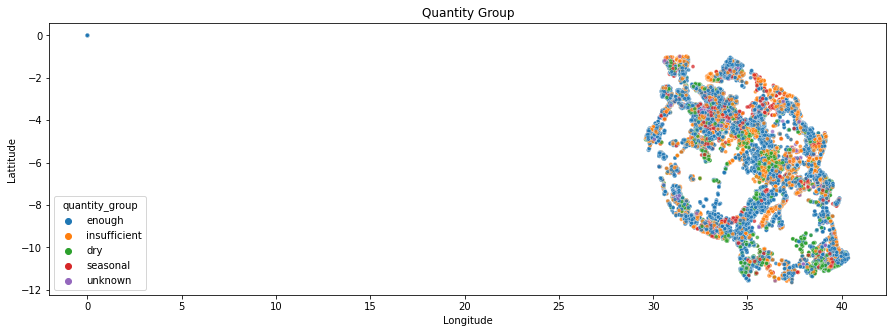

<Figure size 432x288 with 0 Axes>

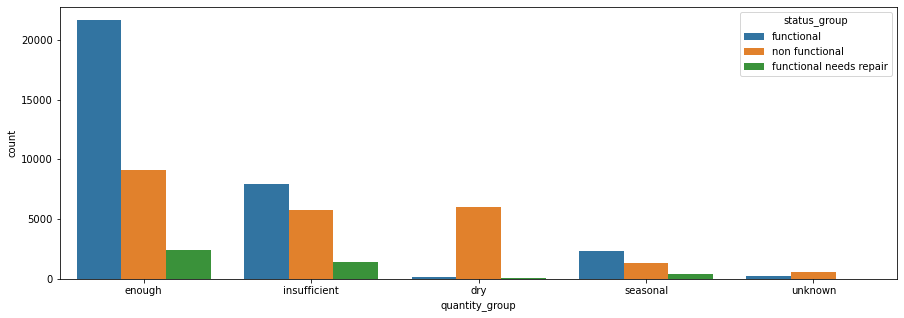

In [291]:
#get value count
print(df['quantity_group'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quantity_group', data = df, alpha = 0.75, s = 15)
plt.title('Quantity Group')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/quantity_group_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'quantity_group', hue = 'status_group', data=df)
plt.savefig('./Data/quantity_group_countplot')

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


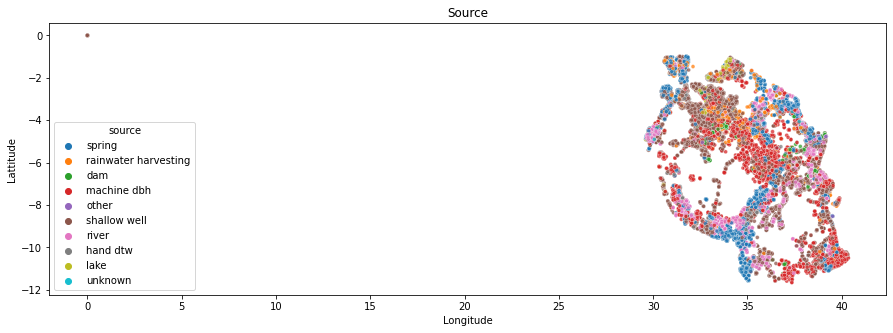

<Figure size 432x288 with 0 Axes>

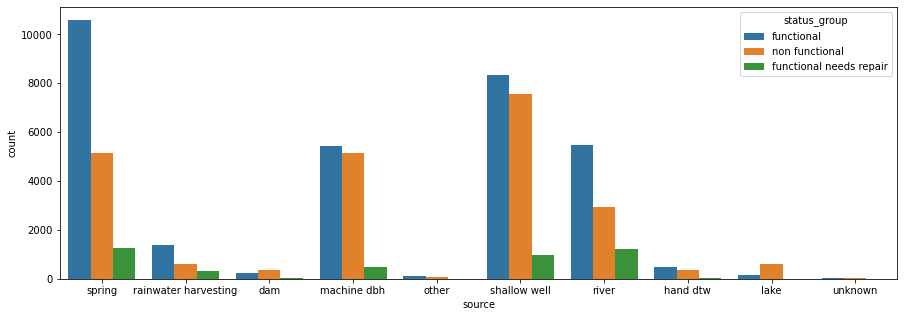

In [292]:
#get value count
print(df['source'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source', data = df, alpha = 0.75, s = 15)
plt.title('Source')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/source_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'source', hue = 'status_group', data=df)
plt.savefig('./Data/source_countplot')

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


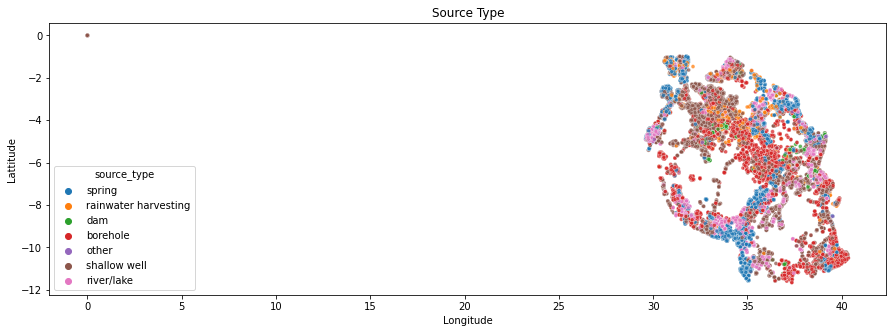

<Figure size 432x288 with 0 Axes>

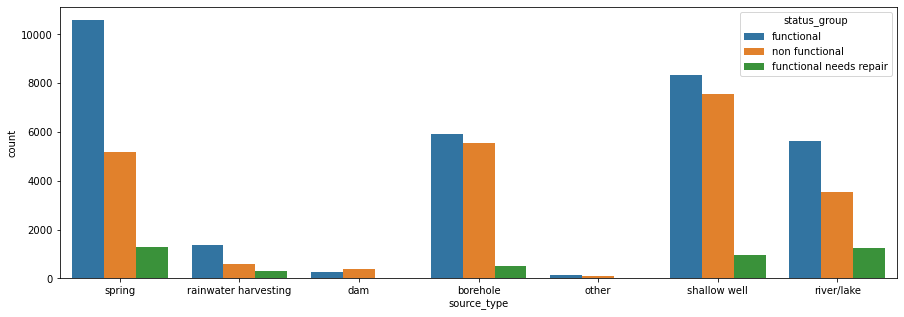

In [293]:
#get value count
print(df['source_type'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source_type', data = df, alpha = 0.75, s = 15)
plt.title('Source Type')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/source_type_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'source_type', hue = 'status_group', data=df)
plt.savefig('./Data/source_type_countplot')

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


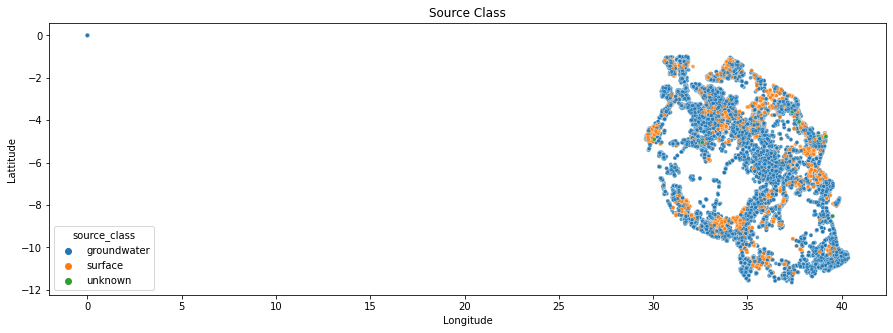

<Figure size 432x288 with 0 Axes>

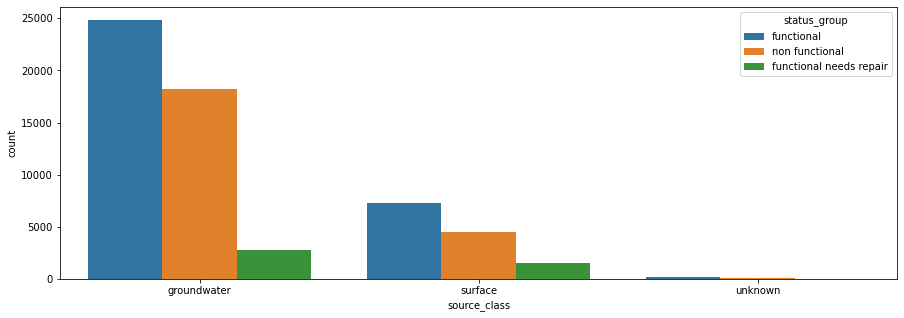

In [294]:
#get value count
print(df['source_class'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source_class', data = df, alpha = 0.75, s = 15)
plt.title('Source Class')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/source_class_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'source_class', hue = 'status_group', data=df)
plt.savefig('./Data/source_class_countplot')

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


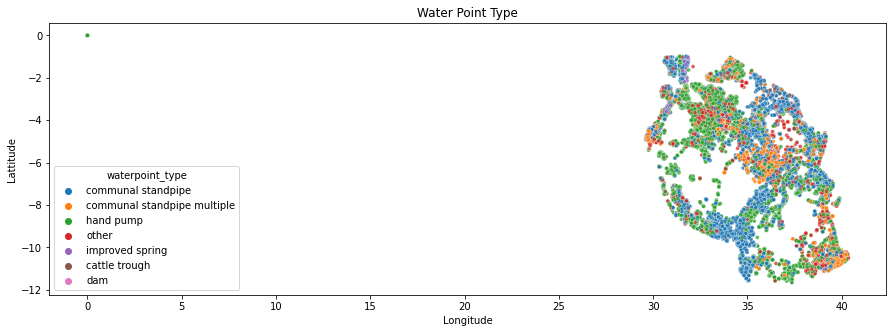

<Figure size 432x288 with 0 Axes>

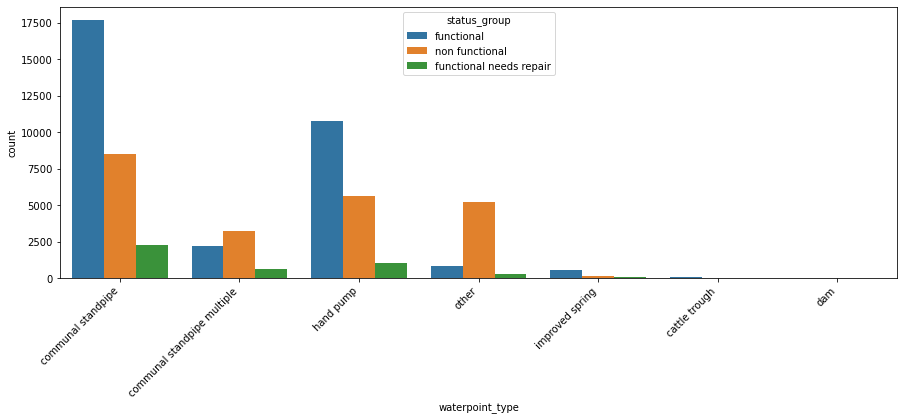

In [300]:
#get value count
print(df['waterpoint_type'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'waterpoint_type', data = df, alpha = 0.75, s = 15)
plt.title('Water Point Type')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/waterpoint_type_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'waterpoint_type', hue = 'status_group', data=df)
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/waterpoint_type_countplot')

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


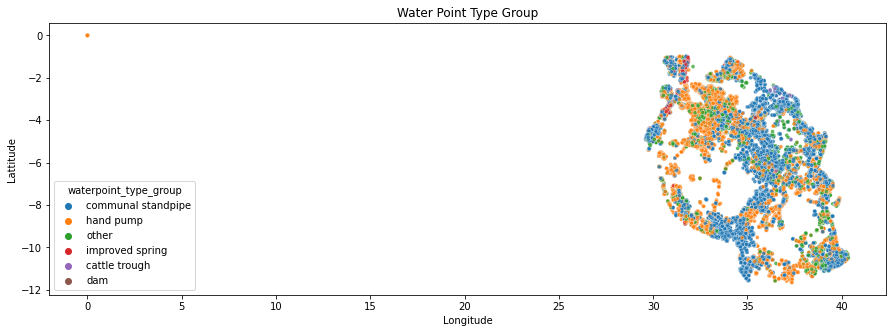

<Figure size 432x288 with 0 Axes>

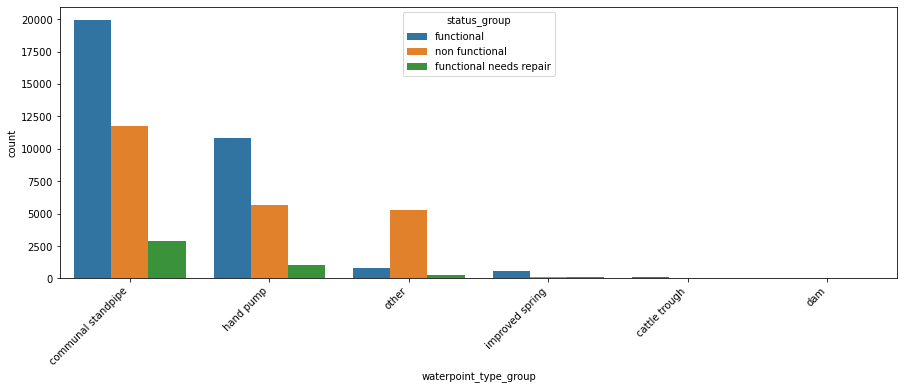

In [301]:
#get value count
print(df['waterpoint_type_group'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'waterpoint_type_group', data = df, alpha = 0.75, s = 15)
plt.title('Water Point Type Group')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/waterpoint_type_group_scatterplot')

plt.figure(figsize = (15, 5))
sns.countplot(x = 'waterpoint_type_group', hue = 'status_group', data=df)
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/waterpoint_type_group_countplot')

## Data Scrubing